# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau``` e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
# Importando as bibliotecas
# numpy e pandas para analisar os dados.
# seaborn e matplotlib para visualização dos dados.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas que serão utilizadas na predição dos dados.

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# Aqui eu realizo o import dos dados para o ambiente de trabalho.

arquivo = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 7\Base_Dados.csv"

df = pd.read_csv(arquivo, sep=',')

In [4]:
# Aqui eu uso o head e o info para visualizar a minha base de dados e o tipo de dado de cada variável.
# Como pode-se observar os dados já estão tratados.

df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

In [6]:
# Na variável y eu coloco minha variável resposta, mau.
# Na variável X eu coloco as demais variáveis explicativas.

y = df.mau

In [7]:
X = df.drop('mau', axis=1)

In [8]:
# Depois de separar a minha variável resposta das variáveis explicativas, eu separo a base de dados em duas, treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [9]:
X_train.shape

(11655, 29)

In [10]:
X_test.shape

(4995, 29)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

##### 2.1

O objetivo da função é predizer se uma pessoa é boa ou má pagadora, se tornando inadimplente.

##### 2.2

In [11]:
# Aqui eu realizo o treinamento do modelo com os dados separados para treinamento.

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

In [16]:
predict = clf.predict(X_test)

In [28]:
predict_1 = clf.predict(X_train)

##### 2.3

[Text(0.5734191049168975, 0.98, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Bom'),
 Text(0.5689869719529086, 0.94, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Bom'),
 Text(0.266919148199446, 0.9, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Bom'),
 Text(0.12077562326869806, 0.86, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Bom'),
 Text(0.10637119113573407, 0.82, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Bom'),
 Text(0.09085872576177285, 0.78, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Bom'),
 Text(0.08642659279778393, 0.74, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Bom'),
 Text(0.09529085872576178, 0.74, 'idade <= 28.595\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\nclass = Bom'),
 Text(0.09085872576177285, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Mau'),

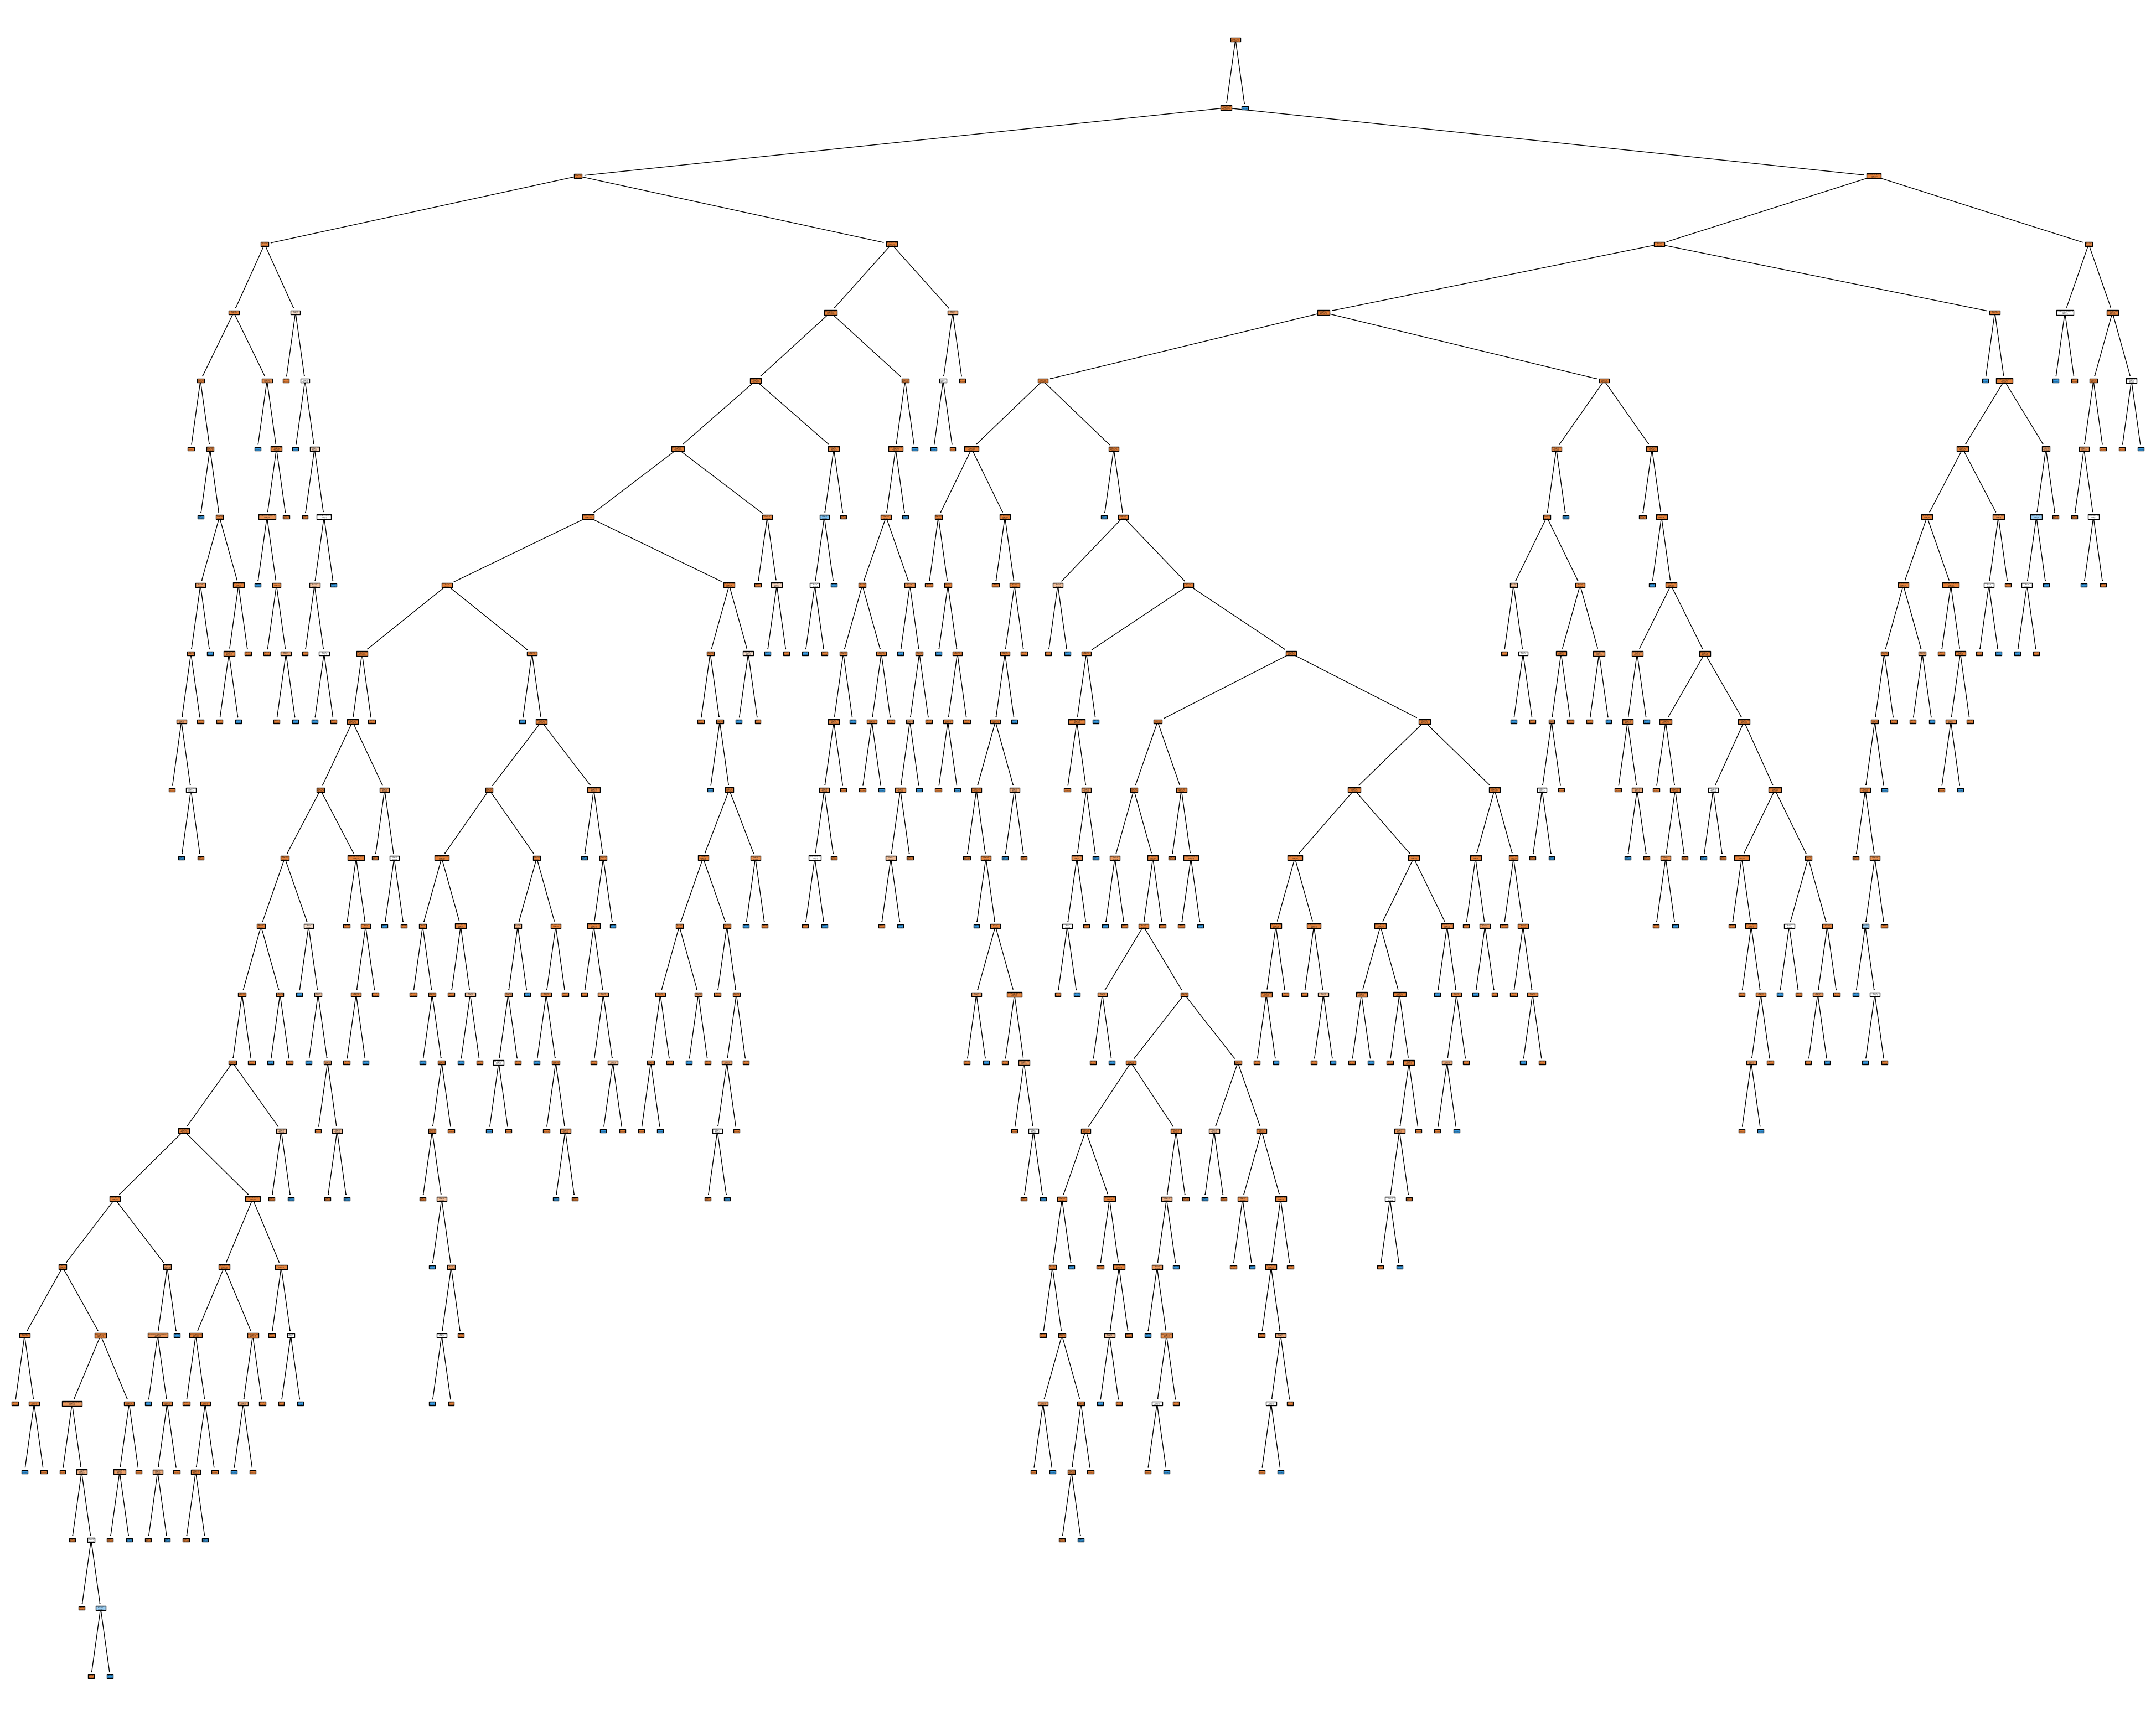

In [14]:
# Aqui realizo o plot da árvore com todas as variáveis.
# Mesmo aumentando o tamanho da figura ainda é muito difícil visualizar as ramificações.
# Pela minha contagem árvore tem profundidade de 23.

plt.figure(figsize=[50, 40])
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns)

##### 2.4

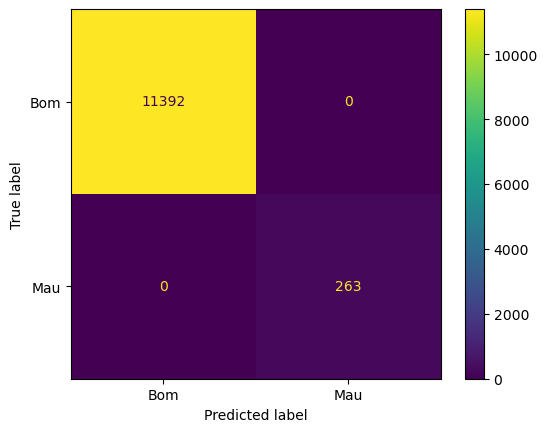

In [15]:
# Aqui temos a matrix de confusão para os dados de treinamento, como podemos observar ocorreu um overfitting na nossa base, dado que o treinamento acertou 100% dos dados.

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Bom', 'Mau'])
plt.show()

##### 2.5

In [26]:
X_train.shape

(11655, 29)

In [27]:
(11392+263)/11655

1.0

In [29]:
# O modelo apresentou ums acurácia de 100%, ou seja, ele acertou todas as previsões que ele fez, o nos faz pensar fortemente que nosso modelo está overfitting.

accuracy_score(y_train, predict_1)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

##### 3.1

A base de testes pode ser classificada como overfitting. Dado que ela previu com 100% de acurácia os nossos dados.

##### 3.2

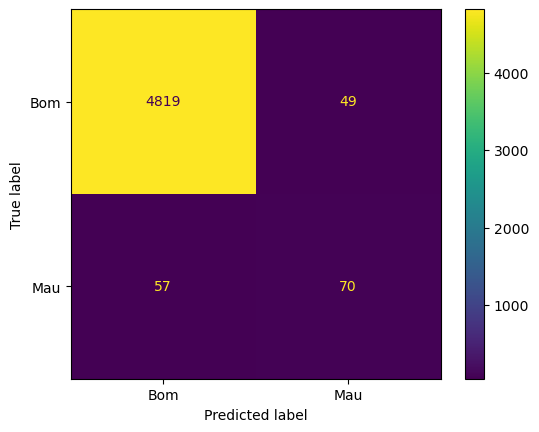

In [24]:
# Aqui realizo o plot da matrix de confusão para base de teste.

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Bom', 'Mau'])
plt.show()

##### 3.3

In [25]:
# O modelo apresentou uma acurácia de quase 100% um valor muito elevado e próximo do valor obtido no treinamento.
# Mesmo não sendo 100% esse valor continua sendo muito elevado.

accuracy_score(y_test, predict)

0.9787787787787787

##### 3.4

In [30]:
# Aqui eu faço a árvore com uma profundidade de 10 e random state de 123

clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9837837837837838

[Text(0.5566014056224899, 0.9545454545454546, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Bom'),
 Text(0.5485692771084337, 0.8636363636363636, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Bom'),
 Text(0.25301204819277107, 0.7727272727272727, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Bom'),
 Text(0.09036144578313253, 0.6818181818181818, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Bom'),
 Text(0.060240963855421686, 0.5909090909090909, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Bom'),
 Text(0.024096385542168676, 0.5, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Bom'),
 Text(0.01606425702811245, 0.4090909090909091, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Bom'),
 Text(0.0321285140562249, 0.4090909090909091, 'idade <= 28.595\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\ncl

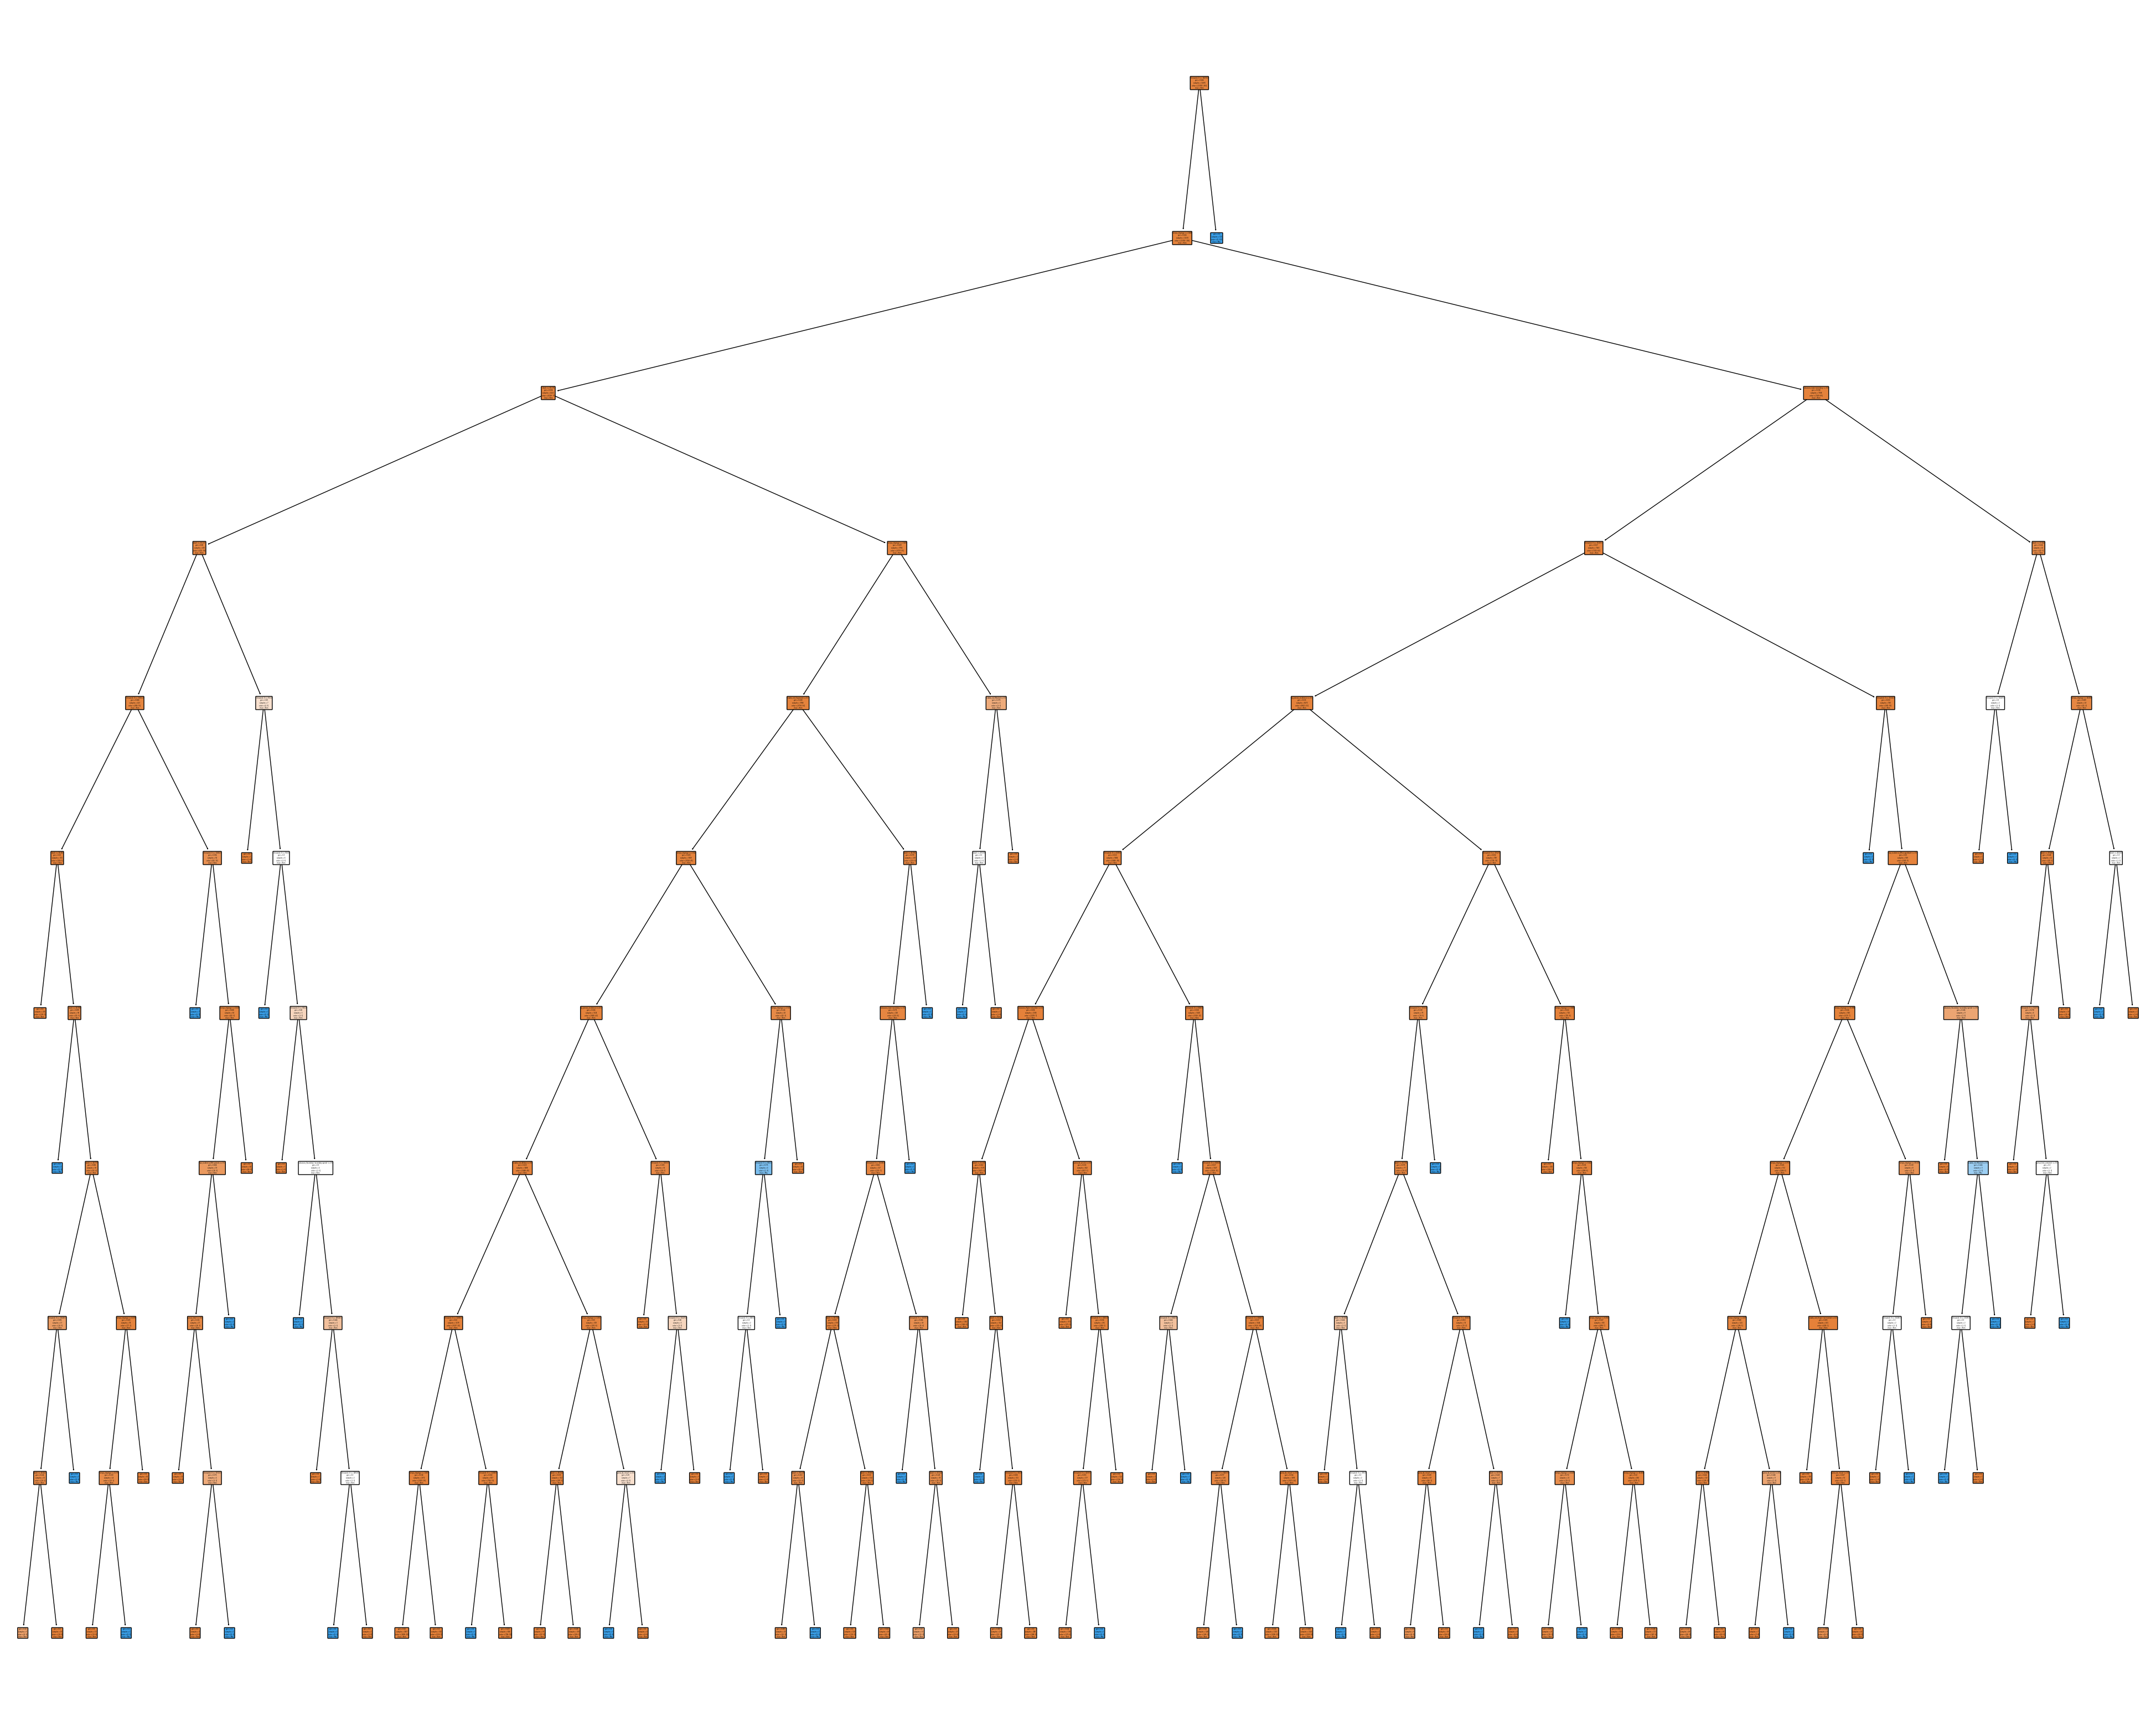

In [32]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

In [33]:
# Agora eu faço a árvore com pelo menos 5 folhas e random state de 123

clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9847847847847848

[Text(0.5988470441595442, 0.9772727272727273, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Bom'),
 Text(0.5912497032288699, 0.9318181818181818, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Bom'),
 Text(0.2854641500474834, 0.8863636363636364, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Bom'),
 Text(0.14719848053181386, 0.8409090909090909, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Bom'),
 Text(0.1396011396011396, 0.7954545454545454, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Bom'),
 Text(0.10921177587844255, 0.75, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Bom'),
 Text(0.10161443494776828, 0.7045454545454546, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Bom'),
 Text(0.1168091168091168, 0.7045454545454546, 'idade <= 28.777\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\nclass

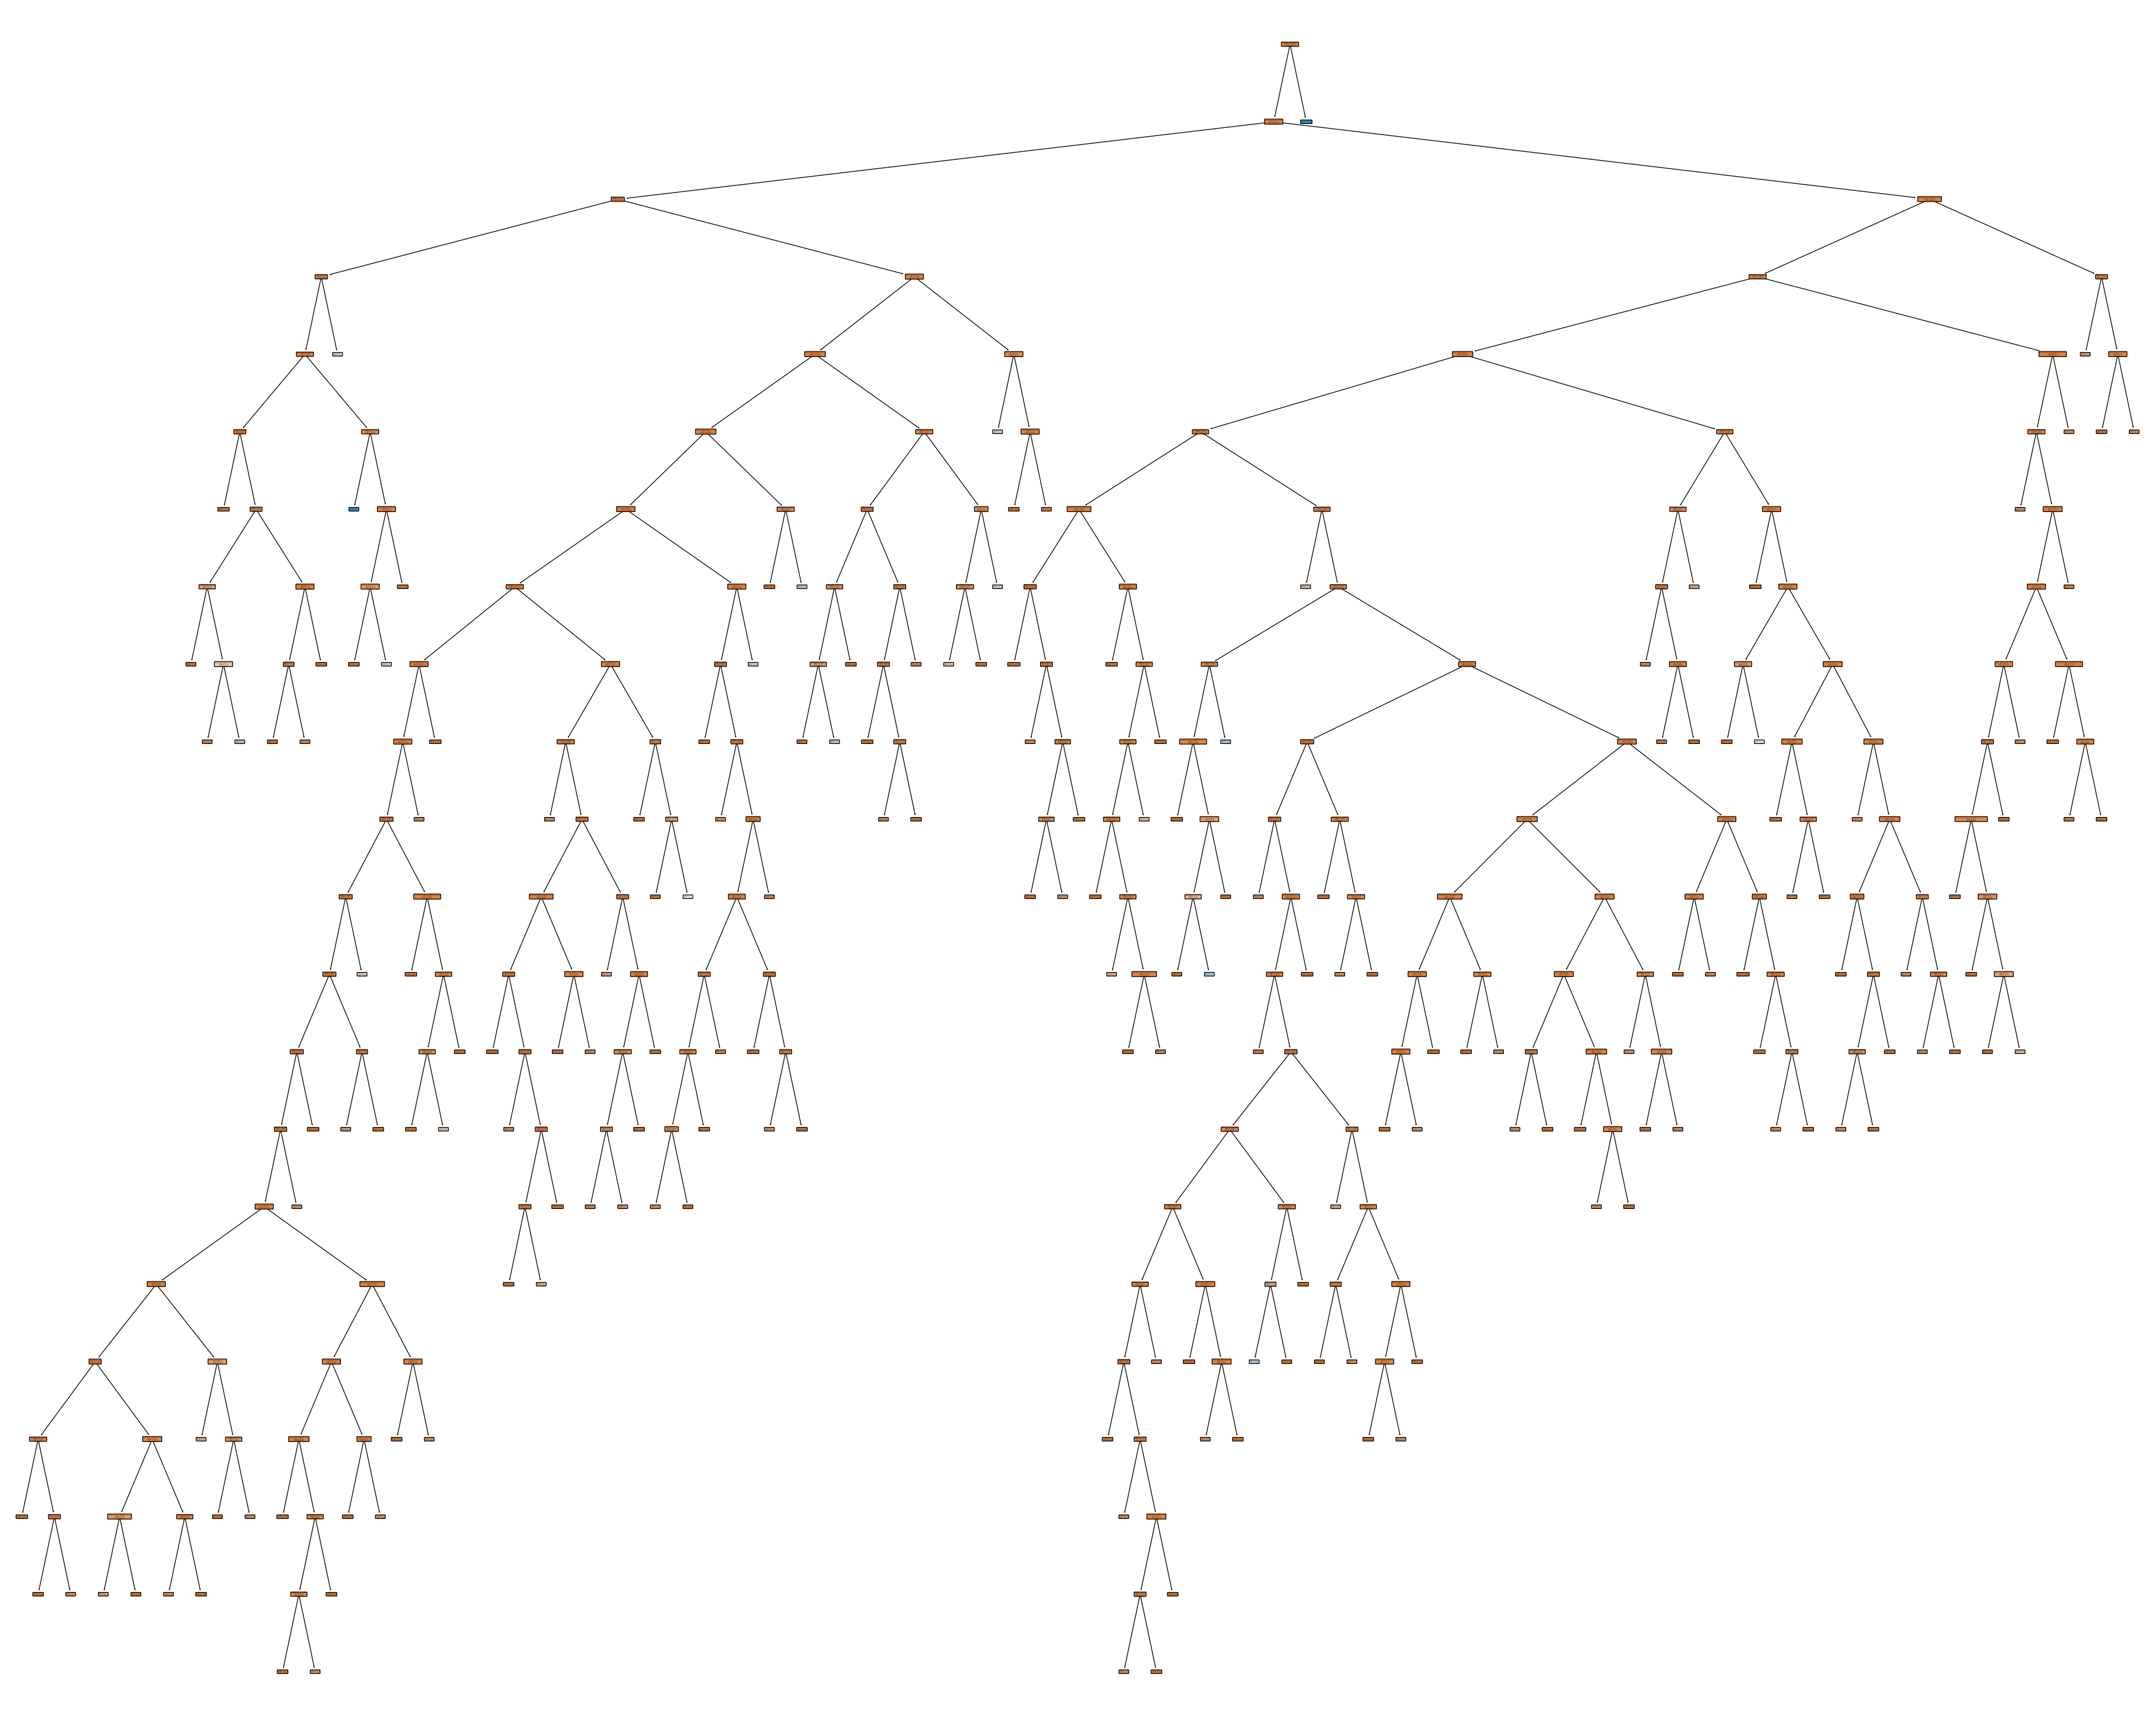

In [34]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

In [43]:
# Agora realizo uma combinação de ambas, mínimo de 5 folhas, profundida máxima de 10 e random state de 123.


clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9851851851851852

[Text(0.57734375, 0.9545454545454546, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Bom'),
 Text(0.5662326388888889, 0.8636363636363636, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Bom'),
 Text(0.2498263888888889, 0.7727272727272727, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Bom'),
 Text(0.1, 0.6818181818181818, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Bom'),
 Text(0.08888888888888889, 0.5909090909090909, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Bom'),
 Text(0.044444444444444446, 0.5, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Bom'),
 Text(0.03333333333333333, 0.4090909090909091, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Bom'),
 Text(0.05555555555555555, 0.4090909090909091, 'idade <= 28.777\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\nclass = Bom'),
 Text(0.0222

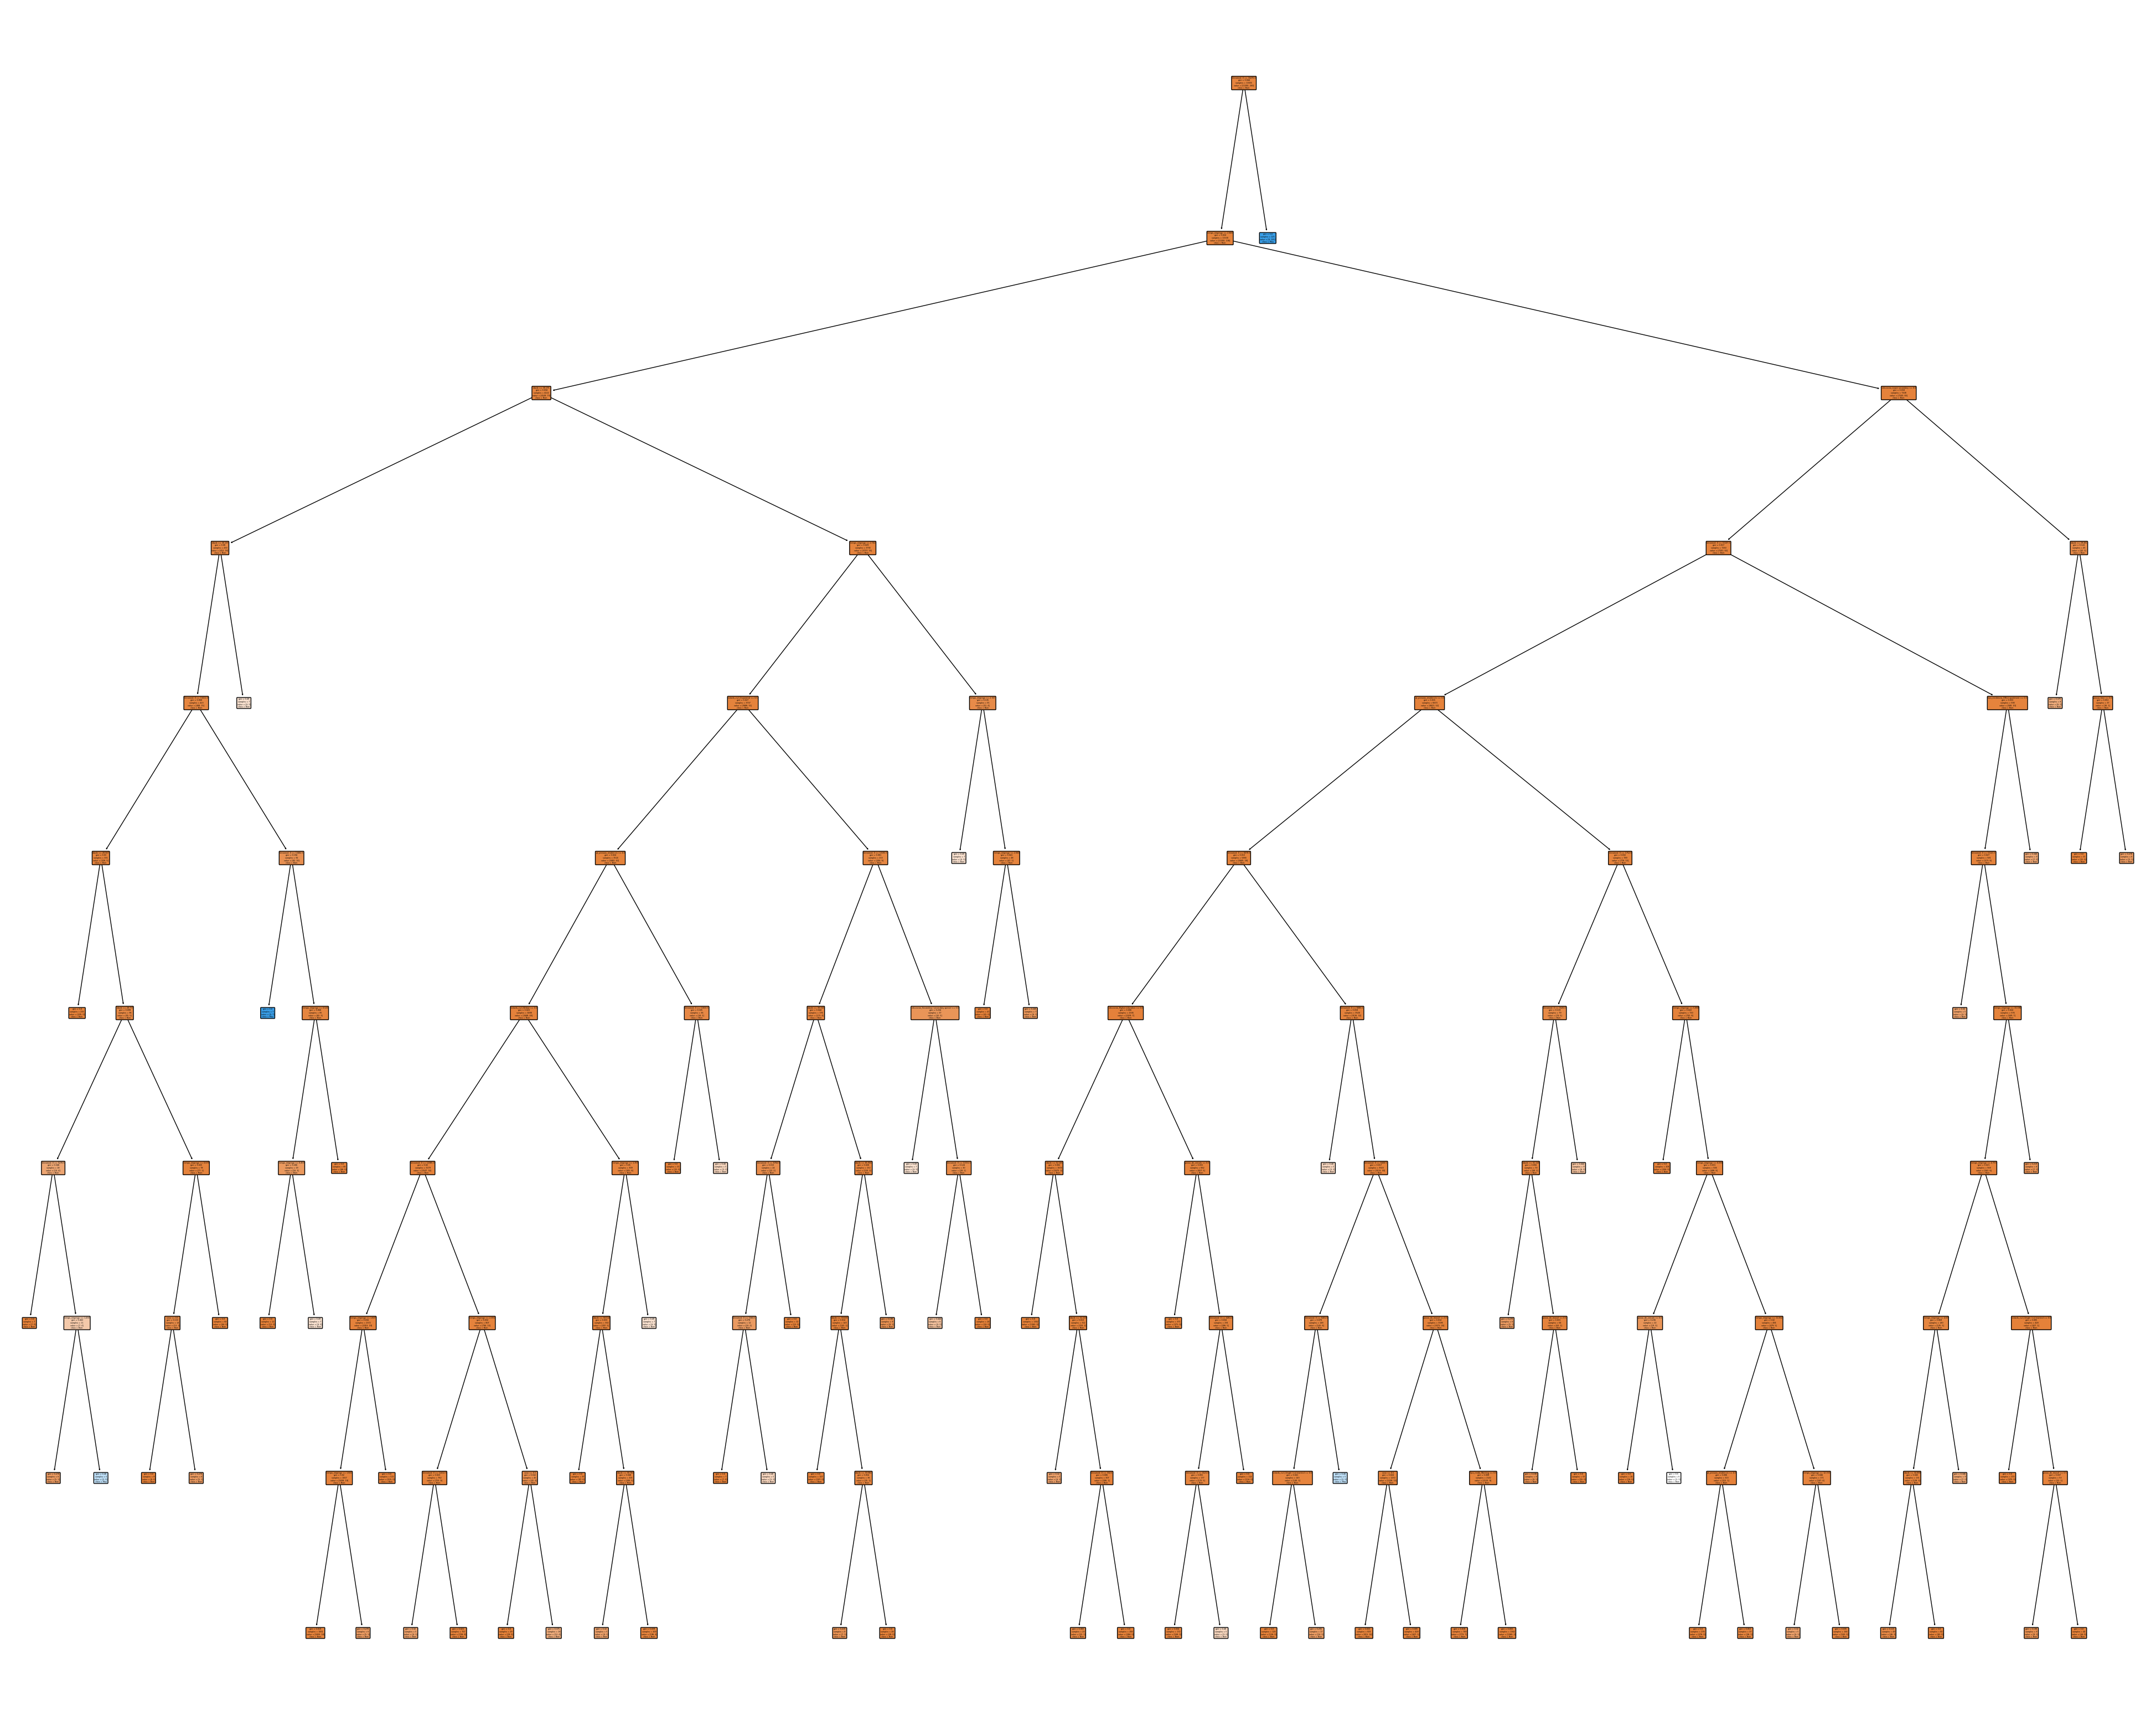

In [36]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

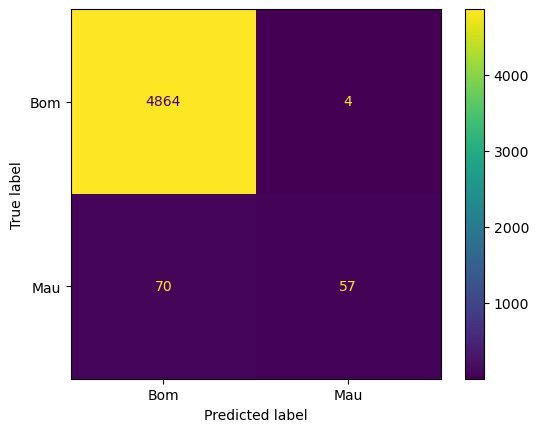

In [47]:
# Aqui realizo o plot da matrix de confusão para base de teste.

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Bom', 'Mau'])
plt.show()

In [46]:
X_test.shape

(4995, 29)

In [48]:
(4864+57)/4995

0.9851851851851852

In [49]:
(4+57)/4995

0.012212212212212211

A nova árvore teve uma acurácia ligeiramente maior, mesmo realizando as limitações.\
Além disso, a proporção de pessoas classificadas como maus pagadores contínua bem baixa, pouco mais de 1%.

##### 3.5

Caso todos os dados fossem classificados como "Bom", o modelo ainda teria uma acurácia muito elevada. Dado que o modelo erraria apenas pouco mais de 1%.

In [50]:
(70+4)/4995

0.014814814814814815